Please upload 'data.csv' file now...


Saving data.csv to data.csv
Dataset loaded successfully!

First 5 rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom   

Last 5 rows:
       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY N

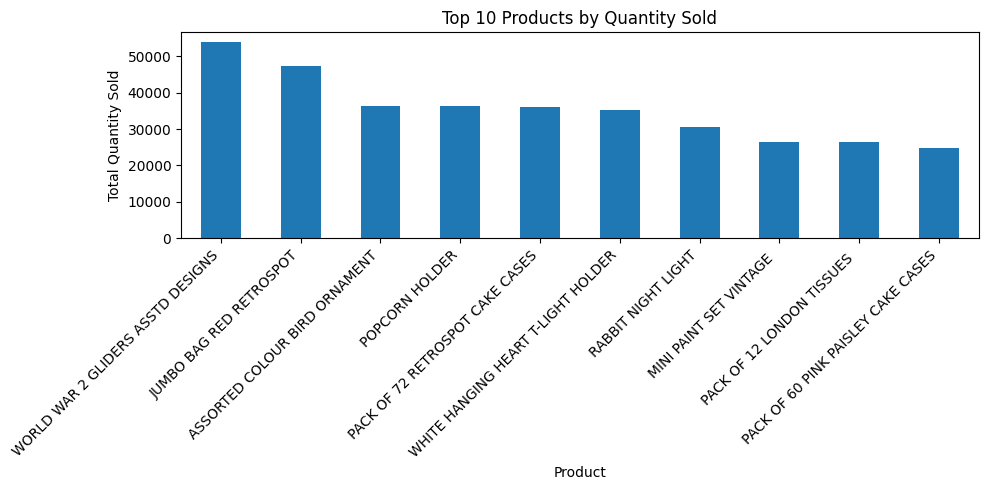

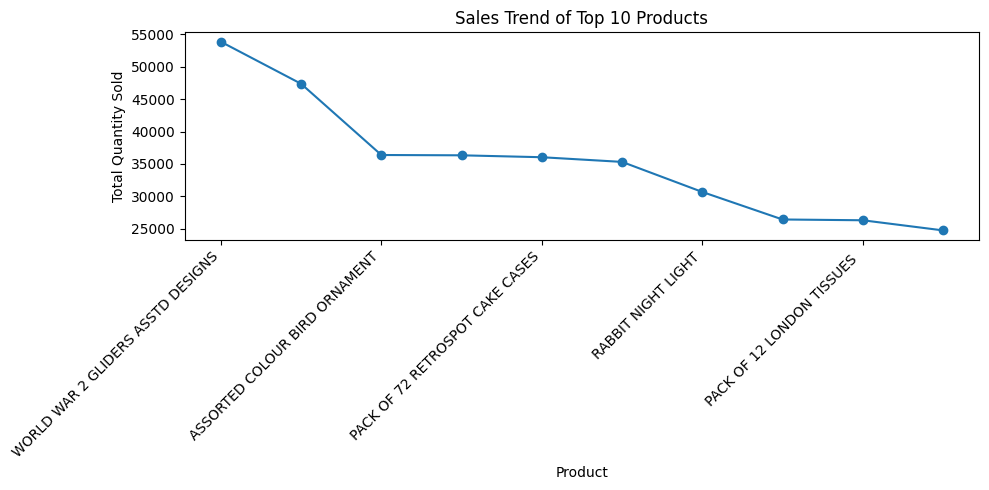

In [ ]:
# ---------------------------------------------------
# Data Analysis & Visualization
# Name    : Navithanjali
# Roll No : 24BAD077
# ---------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# STEP 0: Upload the CSV file manually in Colab
print("Please upload 'data.csv' file now...")
uploaded = files.upload()  # This will prompt you to upload the file

# STEP 1: Load the dataset
df = pd.read_csv("data.csv", encoding="ISO-8859-1")

print("Dataset loaded successfully!\n")

# STEP 2: Inspect the dataset
print("First 5 rows:")
print(df.head(), "\n")

print("Last 5 rows:")
print(df.tail(), "\n")

print("Dataset Information:")
print(df.info(), "\n")

print("Statistical Summary:")
print(df.describe(), "\n")

# STEP 3: Check for missing values
print("Missing values in each column:")
print(df.isnull().sum(), "\n")

# STEP 4: Sales per product (Top 10 products)
product_sales = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("Top 10 products by quantity sold:")
print(product_sales, "\n")

# STEP 5: Bar chart visualization
plt.figure(figsize=(10, 5))
product_sales.plot(kind="bar")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# STEP 6: Line chart visualization
plt.figure(figsize=(10, 5))
product_sales.plot(kind="line", marker="o")
plt.title("Sales Trend of Top 10 Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Please upload the 'diabetes.csv' file now...


Saving diabetes.csv to diabetes.csv
Dataset loaded successfully!

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    ----------

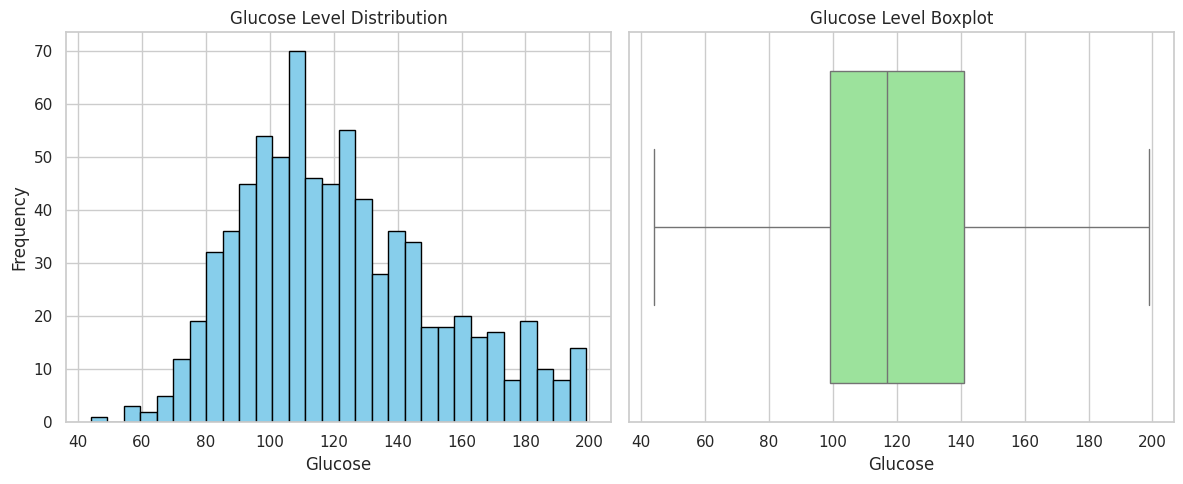

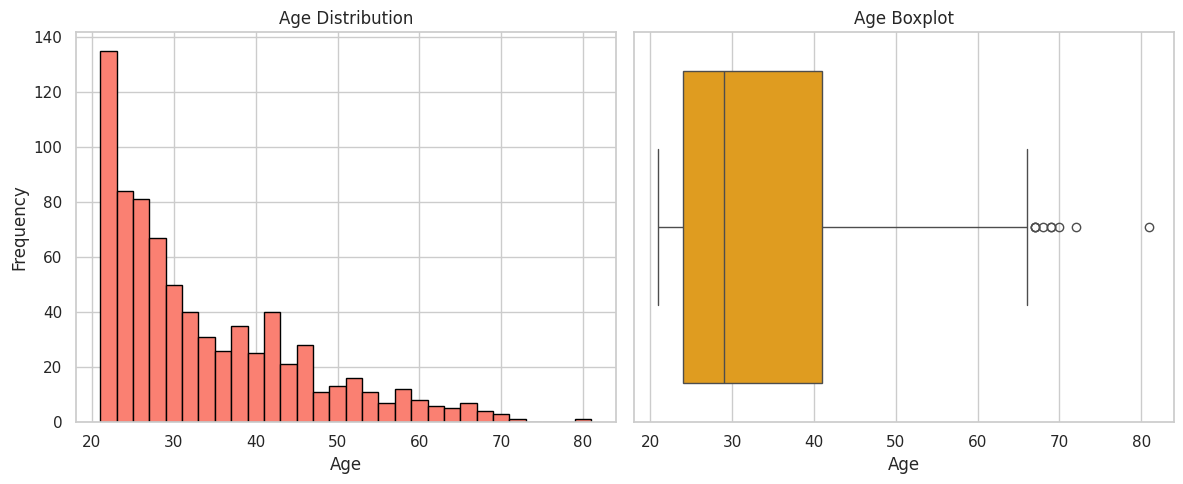

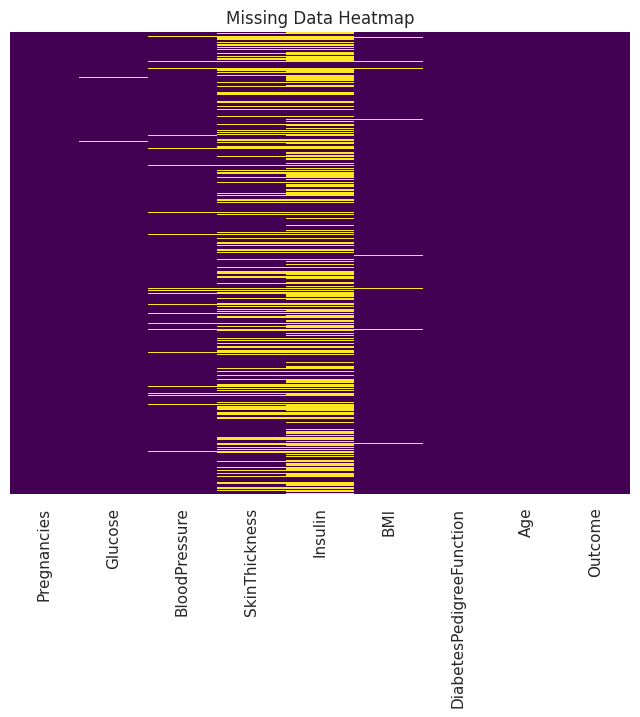

In [ ]:
# ---------------------------------------------------
# Hospital Patient Records Analysis
# Name    : Navithanjali
# Roll No : 24BAD077
# Lab Task: Patient Data Exploration & Visualization
# ---------------------------------------------------

# ---------------------------------------------------
# Hospital Patient Records Analysis
# Dataset: Pima Indians Diabetes (Kaggle)
# ---------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# STEP 0: Upload the CSV file manually in Colab
print("Please upload the 'diabetes.csv' file now...")
uploaded = files.upload()  # Upload the dataset from your local machine

# STEP 1: Load the dataset
df = pd.read_csv("diabetes.csv")

print("Dataset loaded successfully!\n")

# STEP 2: Explore data structure and missing values
print("First 5 rows:")
print(df.head(), "\n")

print("Dataset Information:")
print(df.info(), "\n")

print("Missing values in each column:")
print(df.isnull().sum(), "\n")

# Note: This dataset uses 0 in certain columns as missing values, we'll check for that next

# STEP 3: Identify missing data patterns
# In this dataset, 0 in some columns indicates missing values (like glucose, blood pressure, etc.)

missing_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("Number of zeros (considered missing) in key health metric columns:")
for col in missing_zero_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count}")

print()

# STEP 4: Replace zeros with NaN for better missing data handling
df[missing_zero_cols] = df[missing_zero_cols].replace(0, pd.NA)

print("Updated missing value counts after replacing 0 with NaN:")
print(df.isnull().sum(), "\n")

# STEP 5: Visualize glucose levels and age distribution

plt.figure(figsize=(12, 5))

# Histogram - Glucose
plt.subplot(1, 2, 1)
plt.hist(df["Glucose"].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")

# Boxplot - Glucose
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Glucose"], color='lightgreen')
plt.title("Glucose Level Boxplot")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

# Histogram - Age
plt.subplot(1, 2, 1)
plt.hist(df["Age"], bins=30, color='salmon', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Boxplot - Age
plt.subplot(1, 2, 2)
sns.boxplot(x=df["Age"], color='orange')
plt.title("Age Boxplot")

plt.tight_layout()
plt.show()

# STEP 6: Visualize missing value patterns using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


Please upload the housing dataset CSV file now...


Saving Housing.csv to Housing.csv
Dataset loaded successfully!

Columns in dataset:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'] 

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          54

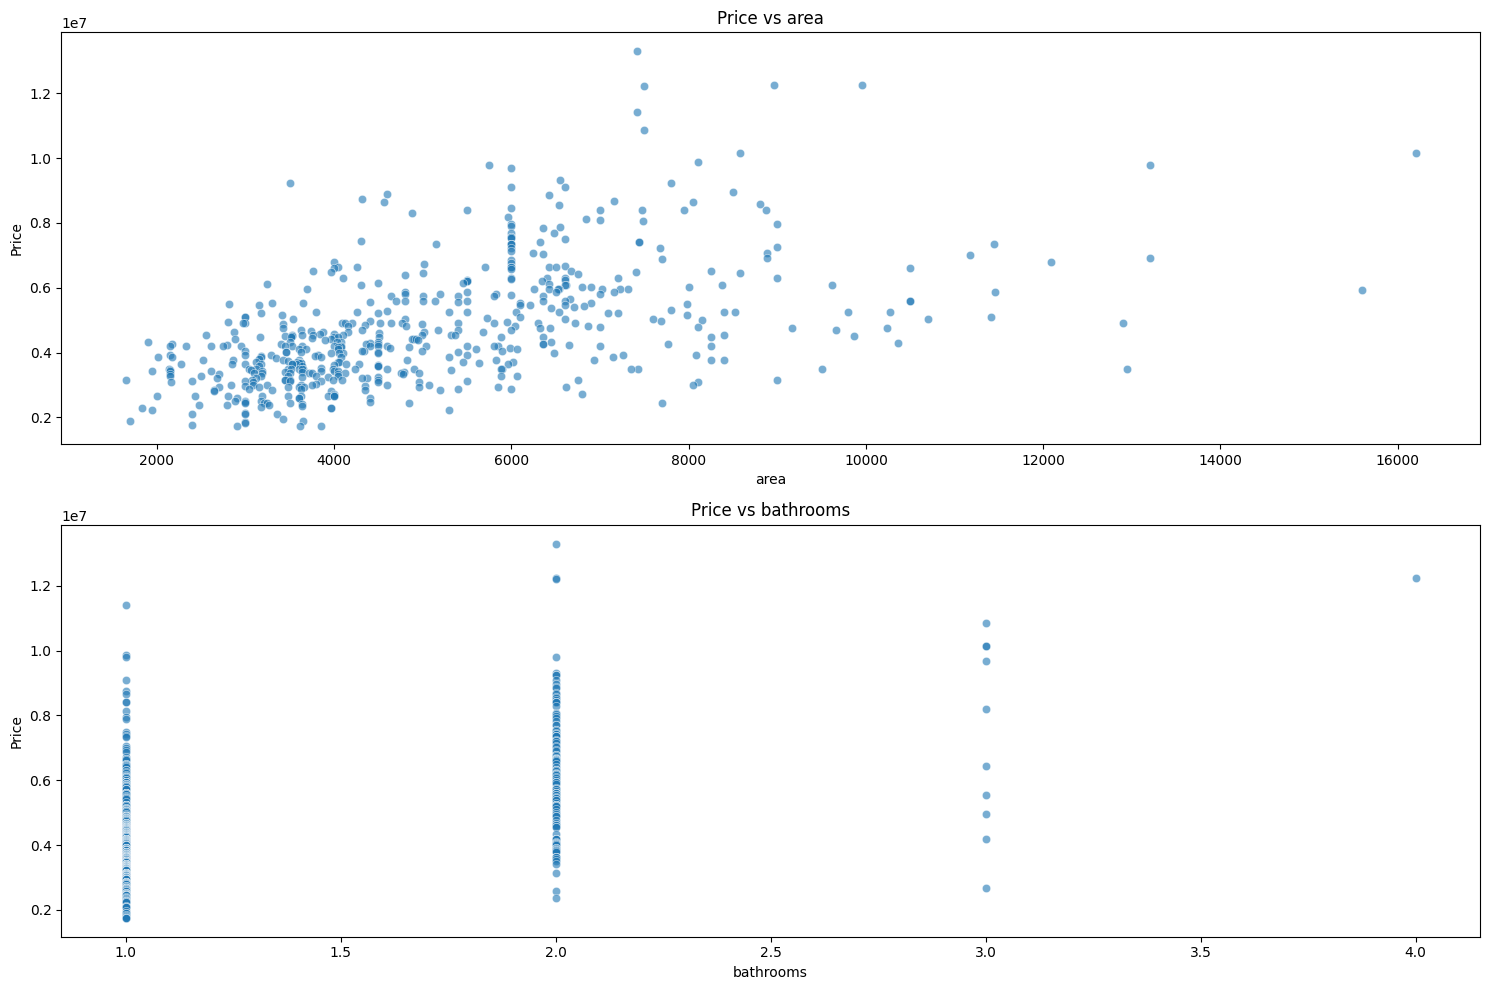

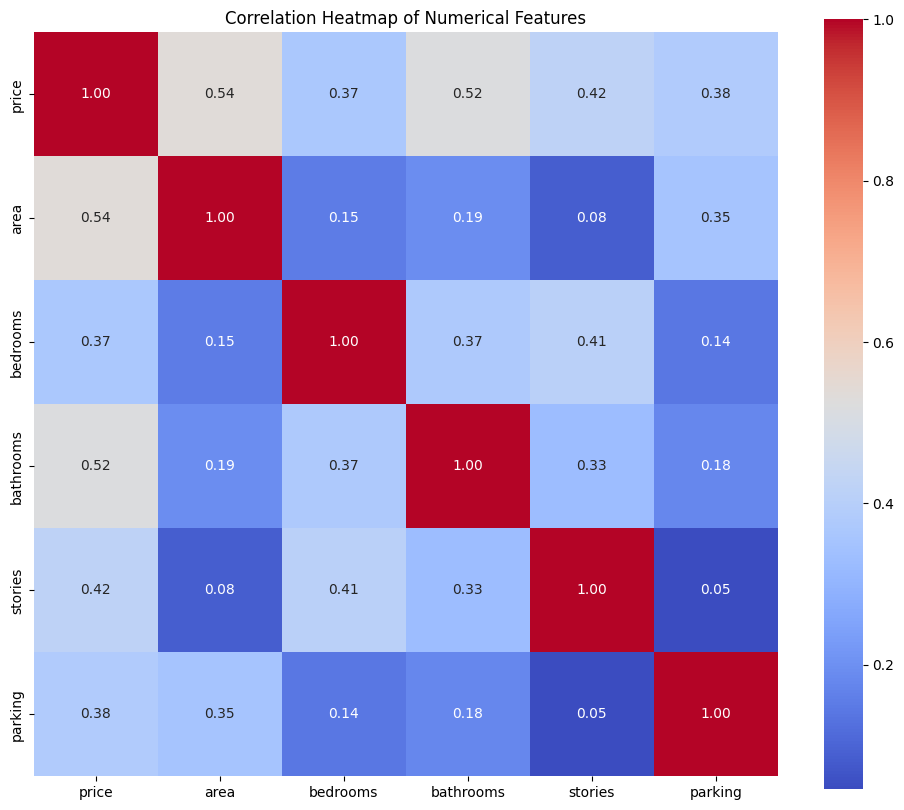

Interpretation Summary:

- Features with strong positive correlation to price suggest they increase the value of the house,
  e.g., 'sqft_living', 'grade', 'sqft_above' typically mean bigger or better-quality homes.

- Features with negative correlation indicate inverse relationship, possibly 'bedrooms' or 'bathrooms' in some datasets if overbuilt.

- Scatter plots help visualize spread and outliers — important to consider in modeling.

- Missing values should be handled carefully (imputation or removal) to avoid bias.

- Strongly correlated features are good predictors for price in regression models.

- Further feature engineering and domain knowledge will improve predictions.



In [ ]:
# ---------------------------------------------------
# Housing Dataset Analysis
# Dataset: Housing Price Prediction (Kaggle)
# ---------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# STEP 0: Upload dataset manually
print("Please upload the housing dataset CSV file now...")
uploaded = files.upload()  # Upload your housing dataset CSV (e.g. housing.csv)

# STEP 1: Load the dataset
# Replace 'housing.csv' below with your exact uploaded filename if different
df = pd.read_csv("Housing.csv")

print("Dataset loaded successfully!\n")

# STEP 2: Inspect columns and data structure
print("Columns in dataset:")
print(df.columns.tolist(), "\n")

print("Dataset info:")
print(df.info(), "\n")

print("First 5 rows:")
print(df.head(), "\n")

# STEP 3: Detect and summarize missing values
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0], "\n")

# STEP 4: Visualize correlations between numerical features

# Select numeric columns only for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

print("Correlation matrix (numeric features):")
print(corr_matrix, "\n")

# Scatter plots: Price vs selected numeric features with high correlation (absolute corr > 0.5)
high_corr_features = corr_matrix['price'].abs().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features > 0.5].index.drop('price')

print("Features highly correlated with price (|corr| > 0.5):")
print(list(high_corr_features), "\n")

plt.figure(figsize=(15, 5 * len(high_corr_features)))

for i, feature in enumerate(high_corr_features, 1):
    plt.subplot(len(high_corr_features), 1, i)
    sns.scatterplot(data=df, x=feature, y='price', alpha=0.6)
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")

plt.tight_layout()
plt.show()

# STEP 5: Heatmap of correlations for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# STEP 6: Interpretation of trends for price prediction (printed summary)

print("Interpretation Summary:")
print("""
- Features with strong positive correlation to price suggest they increase the value of the house,
  e.g., 'sqft_living', 'grade', 'sqft_above' typically mean bigger or better-quality homes.

- Features with negative correlation indicate inverse relationship, possibly 'bedrooms' or 'bathrooms' in some datasets if overbuilt.

- Scatter plots help visualize spread and outliers — important to consider in modeling.

- Missing values should be handled carefully (imputation or removal) to avoid bias.

- Strongly correlated features are good predictors for price in regression models.

- Further feature engineering and domain knowledge will improve predictions.
""")


Please upload the customer personality dataset CSV file now...


Saving marketing_campaign.csv to marketing_campaign (1).csv
Dataset loaded successfully!

Columns in dataset:
['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'] 

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income       

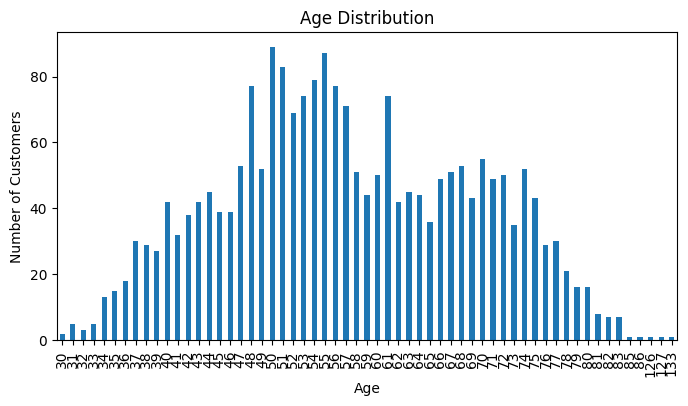

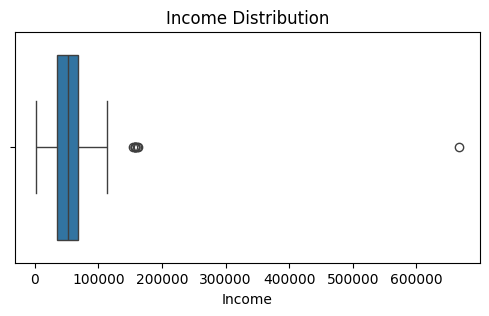

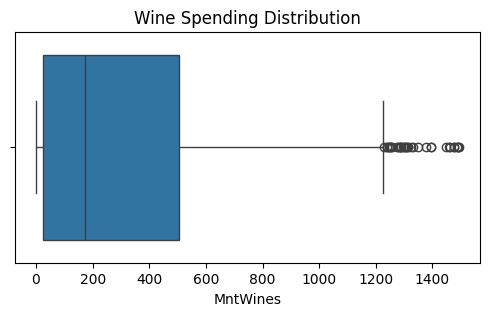

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# STEP 0: Upload dataset
print("Please upload the customer personality dataset CSV file now...")
uploaded = files.upload()

# STEP 1: Load dataset (TAB separated)
df = pd.read_csv("marketing_campaign.csv", sep="\t")
print("Dataset loaded successfully!\n")

# STEP 2: Examine structure
print("Columns in dataset:")
print(df.columns.tolist(), "\n")

print("Dataset info:")
print(df.info(), "\n")

print("First 5 rows:")
print(df.head(), "\n")

# STEP 3: Check missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0], "\n")

# STEP 4: Feature Engineering – Age
df['Age'] = 2026 - df['Year_Birth']

# STEP 5: Statistical Summary
print("Statistical Summary:")
print(df[['Age', 'Income', 'MntWines']].describe(), "\n")

# STEP 6: Bar Plot – Age Distribution
plt.figure(figsize=(8,4))
df['Age'].value_counts().sort_index().plot(kind='bar')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

# STEP 7: Box Plot – Income
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Income'])
plt.title("Income Distribution")
plt.show()

# STEP 8: Box Plot – Wine Spending
plt.figure(figsize=(6,3))
sns.boxplot(x=df['MntWines'])
plt.title("Wine Spending Distribution")
plt.show()


